###  Question 
Attribute information For bank dataset

   Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

8. Missing Attribute Values: None


###  Importing libraries 

In [97]:
 
import pandas as pd 
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import warnings 
warnings.filterwarnings('ignore') 

###  Importing Data  

In [26]:
df1=pd.read_csv("bank-full.csv",sep = ";" )
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [27]:
df1.shape

(45211, 17)

In [28]:
df1.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
9901,39,housemaid,married,primary,no,267,no,no,unknown,9,jun,1151,5,-1,0,unknown,no
37487,52,management,divorced,secondary,no,-607,yes,no,cellular,13,may,449,6,-1,0,unknown,no
20628,31,management,divorced,tertiary,no,297,no,no,cellular,12,aug,127,1,-1,0,unknown,no
25369,34,technician,single,tertiary,no,2047,yes,no,cellular,18,nov,72,2,113,5,failure,no
22949,32,technician,divorced,secondary,no,409,no,yes,cellular,26,aug,74,4,-1,0,unknown,no
5026,39,blue-collar,single,secondary,no,1961,no,no,unknown,21,may,216,1,-1,0,unknown,no
43903,73,retired,married,primary,no,508,no,no,cellular,14,jun,154,4,97,1,success,no
40361,32,entrepreneur,married,primary,no,3083,no,no,cellular,22,jun,271,2,-1,0,unknown,no
15066,39,management,married,primary,no,3760,no,yes,cellular,17,jul,262,1,-1,0,unknown,no
17432,35,services,divorced,secondary,no,742,no,no,cellular,28,jul,83,7,-1,0,unknown,no


In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [30]:
df1.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [31]:
df1.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [32]:
df1.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Length: 45211, dtype: bool

In [33]:
df1.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


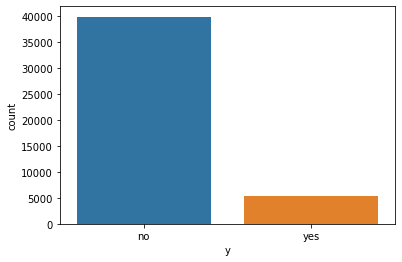

In [34]:
 sns.countplot(df1["y"]);

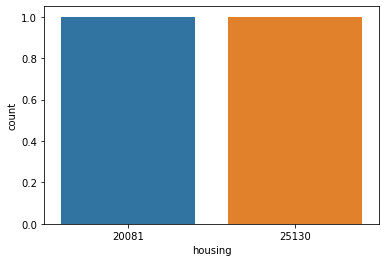

In [35]:
sns.countplot(df1['housing'].value_counts()) ;

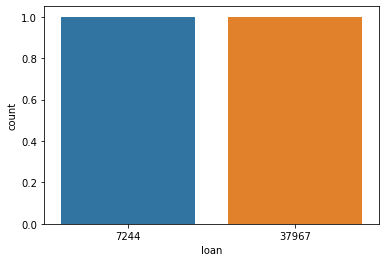

In [36]:
sns.countplot(df1['loan'].value_counts()) ;

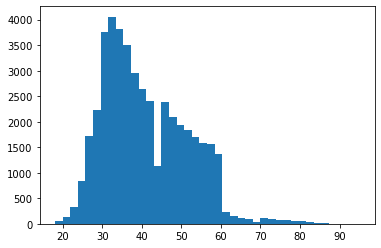

In [37]:
plt.hist(df1['age'],bins=40);


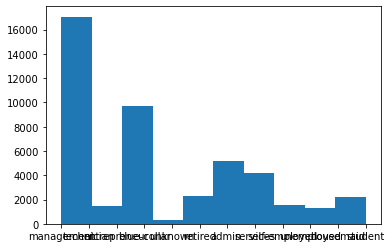

In [38]:
plt.hist(df1['job']);


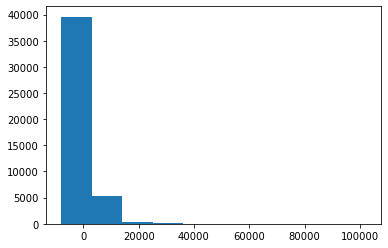

In [39]:
plt.hist(df1['balance'],bins=10);

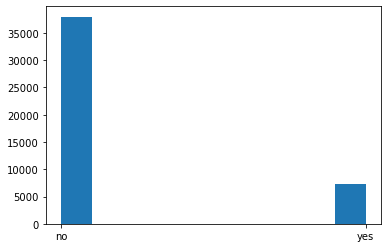

In [40]:
plt.hist(df1['loan']);

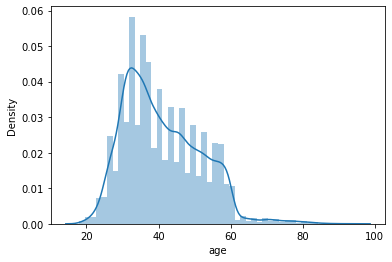

In [41]:
sns.distplot(df1['age']); 


<AxesSubplot:xlabel='age'>

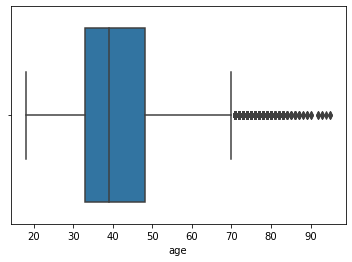

In [42]:
sns.boxplot(df1['age'])

<AxesSubplot:xlabel='day'>

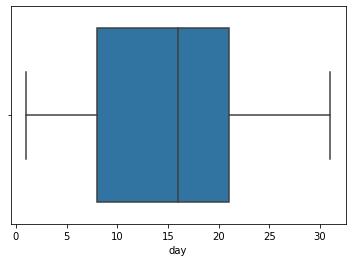

In [43]:
sns.boxplot(df1['day'])

In [44]:
df1.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [45]:
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test = train_test_split(df1.iloc[:,0:16],df1.iloc[:,-1],test_size=0.2) 

In [55]:
x_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
35558,33,technician,divorced,tertiary,no,2558,no,no,cellular,7,may,680,2,367,2,failure
8359,51,technician,married,secondary,no,1186,yes,no,unknown,3,jun,450,3,-1,0,unknown
43072,36,unemployed,married,secondary,no,1466,yes,no,unknown,19,feb,124,1,-1,0,unknown
29311,34,technician,married,secondary,no,4,yes,no,cellular,2,feb,105,2,263,1,failure
4033,56,blue-collar,married,unknown,no,22,yes,no,unknown,16,may,103,7,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7208,44,blue-collar,married,secondary,no,776,yes,no,unknown,29,may,306,1,-1,0,unknown
25460,44,admin.,married,secondary,no,1206,no,no,cellular,19,nov,180,3,-1,0,unknown
21663,57,technician,divorced,tertiary,no,114,no,no,cellular,19,aug,281,2,-1,0,unknown
10593,48,unemployed,single,tertiary,no,3229,no,no,unknown,16,jun,1089,1,-1,0,unknown


In [64]:
transformer = ColumnTransformer(transformers=[
    ('st1',OrdinalEncoder(categories=[["unknown","secondary","primary","tertiary"]]),["education"]  ),
    ('st2',OneHotEncoder(sparse=False,drop='first'),["job","contact","month","poutcome","default","housing","loan","marital"]),
],remainder='passthrough')

In [95]:
x_train_tran=transformer.fit_transform(x_train)

In [94]:
x_test_tran=transformer.transform(x_test)


In [91]:
x_test_tran.shape

(9043, 40)

In [92]:
y_test.shape

(9043,)

In [87]:
x_test_tran

array([[  3.,   0.,   0., ...,   2.,  -1.,   0.],
       [  1.,   0.,   0., ...,   1., 196.,   2.],
       [  1.,   0.,   0., ...,   1.,  -1.,   0.],
       ...,
       [  1.,   1.,   0., ...,   3.,  -1.,   0.],
       [  2.,   0.,   0., ...,   2.,  84.,   2.],
       [  1.,   0.,   0., ...,   6.,  -1.,   0.]])

In [88]:
y_test

array([0, 1, 1, ..., 0, 1, 0])

In [80]:
transformer.transform(x_test).shape

(9043, 40)

In [81]:
le= LabelEncoder()

In [82]:
le.fit(y_train)

LabelEncoder()

In [83]:
le.classes_

array([0, 1])

In [71]:
y_train=le.transform(y_train)
y_test=le.transform(y_test)

In [76]:
y_train

array([0, 0, 0, ..., 0, 1, 0])

In [100]:
x_train_tran.shape 

(36168, 40)

In [102]:
x_test_tran.shape

(9043, 40)

In [103]:
y_test.shape

(9043,)

In [104]:
y_train.shape

(36168,)

In [73]:
y_train

array([0, 0, 0, ..., 0, 1, 0])

In [98]:
log_reg = LogisticRegression()

log_reg.fit(x_train_tran, y_train)

LogisticRegression()

In [99]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train_tran,y_train)

DecisionTreeClassifier()

In [106]:
log_reg.coef_

array([[-1.76526480e-01, -2.90856949e-01, -3.18151745e-02,
        -3.91709949e-03,  4.36873299e-02,  1.81504263e-01,
        -1.64818268e-02, -1.14920473e-01,  3.49571577e-02,
        -7.83747026e-02, -4.04517393e-03,  2.26187699e-03,
         6.14078998e-02, -4.78177668e-01,  3.68792908e-02,
         2.54582815e-02, -1.78030567e-02, -1.47269636e-02,
        -9.29959888e-02, -6.07821008e-02,  9.46578153e-02,
        -4.67885033e-01, -6.76694249e-02,  1.12347589e-01,
         8.71912578e-02, -3.76079256e-02,  3.53215773e-01,
        -4.76691167e-01, -2.38562430e-02, -7.40974917e-01,
        -2.11400245e-01, -2.06946527e-01, -1.34011881e-01,
        -1.43792724e-02,  2.66761092e-05, -1.03003236e-02,
         3.86676792e-03, -3.77771244e-01,  2.52259627e-03,
        -1.69467336e-01]])

In [107]:
log_reg.intercept_

array([-0.31459935])

In [120]:
y_pred_train= log_reg.predict(x_train_tran)
y_pred_train

array([1, 0, 0, ..., 0, 1, 0])